In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.tree import DecisionTreeClassifier

# Define butter_filter function
def butter_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Load CSV files into DataFrames
data1 = pd.read_csv('Subject 1 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data2 = pd.read_csv('Subject 2 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data3 = pd.read_csv('Subject 3 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])

# Drop rows with missing values
data1 = data1.dropna()
data2 = data2.dropna()
data3 = data3.dropna()

# Set cutoff frequency and sampling frequency
cutoff_freq = 1 # Hz
fs = 1 / np.mean(np.diff(data1['Time']))

# Filter signal, take second derivative, and detect peaks for data1
filtered_data1 = butter_filter(data1['Current'], cutoff_freq, fs, order=4)
second_derivative1 = np.gradient(np.gradient(filtered_data1))
baseline = np.std(second_derivative1)
best_window1 = None
best_threshold1 = None
best_peaks1 = None
best_score1 = 0
window_sizes = [0.001, 0.005, 0.01, 0.05]
threshold_levels = [1, 2, 3, 4, 5]
for window in window_sizes:
    for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative1, height=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score1:
            best_window1 = window
            best_threshold1 = threshold
            best_peaks1 = peaks
            best_score1 = score
            
num_peaks_per_movement = len(best_peaks1) // 4
left_peaks1 = best_peaks1[:num_peaks_per_movement]
right_peaks1 = best_peaks1[num_peaks_per_movement:num_peaks_per_movement*2]
up_peaks1 = best_peaks1[num_peaks_per_movement*2:num_peaks_per_movement*3]
down_peaks1 = best_peaks1[num_peaks_per_movement*3:]

# Filter signal, take second derivative, and detect peaks for data2
filtered_data2 = butter_filter(data2['Current'], cutoff_freq, fs, order=4)
second_derivative2 = np.gradient(np.gradient(filtered_data2))
best_window2 = None
best_threshold2 = None
best_peaks2 = None
best_score2 = 0
for window in window_sizes:
    for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative2, height=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score2:
        best_window2 = window
        best_threshold2 = threshold
        best_peaks2 = peaks
        best_score2 = score
num_peaks_per_movement = len(best_peaks2) // 4
left_peaks2 = best_peaks2[:num_peaks_per_movement]
right_peaks2 = best_peaks2[num_peaks_per_movement:num_peaks_per_movement2]
up_peaks2 = best_peaks2[num_peaks_per_movement2:num_peaks_per_movement3]
down_peaks2 = best_peaks2[num_peaks_per_movement3:]

# Filter signal, take second derivative, and detect peaks for data3
filtered_data3 = butter_filter(data3['Current'], cutoff_freq, fs, order=4)
second_derivative3 = np.gradient(np.gradient(filtered_data3))
best_window3 = None
best_threshold3 = None
best_peaks3 = None
best_score3 = 0
for window in window_sizes:
for threshold in threshold_levels:
min_dist = int(window * fs)
peaks, properties = find_peaks(second_derivative3, height=threshold * baseline, distance=min_dist)
score = len(peaks)
if score > best_score3:
best_window3 = window
best_threshold3 = threshold
best_peaks3 = peaks
best_score3 = score
num_peaks_per_movement = len(best_peaks3) // 4
left_peaks3 = best_peaks3[:num_peaks_per_movement]
right_peaks3 = best_peaks3[num_peaks_per_movement:num_peaks_per_movement2]
up_peaks3 = best_peaks3[num_peaks_per_movement2:num_peaks_per_movement3]
down_peaks3 = best_peaks3[num_peaks_per_movement3:]

# Construct DataFrame for movement data
movements = ['left', 'right', 'up', 'down']
subject1_movements = pd.DataFrame({'left': left_peaks1, 'right': right_peaks1, 'up': up_peaks1, 'down': down_peaks1})
subject2_movements = pd.DataFrame({'left': left_peaks2, 'right': right_peaks2, 'up': up_peaks2, 'down': down_peaks2})
subject3_movements = pd.DataFrame({'left': left_peaks3, 'right': right_peaks3, 'up': up_peaks3, 'down': down_peaks3})

# Calculate time between movements for each subject
subject1_time_between_movements = pd.DataFrame()
subject2_time_between_movements = pd.DataFrame()
subject3_time_between_movements = pd.DataFrame()

# for movement in movements:
subject1_time_between_movements[movement] = subject1_movements[movement].diff().dropna()
subject2_time_between_movements[movement] = subject2_movements[movement].diff().dropna()
subject3_time_between_movements[movement] = subject3_movements[movement].diff().dropna()

# Create labels for each subject's movement data
subject1_labels = pd.Series([0, 1, 2, 3], index=movements)
subject2_labels = pd.Series([0, 1, 2, 3], index=movements)
subject3_labels = pd.Series([0, 1, 2, 3], index=movements)

# Create training and testing datasets for each subject
subject1_X_train, subject1_X_test, subject1_y_train, subject1_y_test = create_train_test_data(subject1_time_between_movements, subject1_labels)
subject2_X_train, subject2_X_test, subject2_y_train, subject2_y_test = create_train_test_data(subject2_time_between_movements, subject2_labels)
subject3_X_train, subject3_X_test, subject3_y_train, subject3_y_test = create_train_test_data(subject3_time_between_movements, subject2_labels)


IndentationError: expected an indented block (2049547001.py, line 72)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.tree import DecisionTreeClassifier

# Define butter_filter function
def butter_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Load CSV files into DataFrames
data1 = pd.read_csv('Subject 1 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data2 = pd.read_csv('Subject 2 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data3 = pd.read_csv('Subject 3 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])

# Drop rows with missing values
data1 = data1.dropna()
data2 = data2.dropna()
data3 = data3.dropna()

# Set cutoff frequency and sampling frequency
cutoff_freq = 1 # Hz
fs = 1 / np.mean(np.diff(data1['Time']))

# Filter signal, take second derivative, and detect peaks for data1
filtered_data1 = butter_filter(data1['Current'], cutoff_freq, fs, order=4)
second_derivative1 = np.gradient(np.gradient(filtered_data1))
baseline = np.std(second_derivative1)
best_window1 = None
best_threshold1 = None
best_peaks1 = None
best_score1 = 0
window_sizes = [0.001, 0.005, 0.01, 0.05]
threshold_levels = [1, 2, 3, 4, 5]
for window in window_sizes:
    for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative1, height=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score1:
            best_window1 = window
            best_threshold1 = threshold
            best_peaks1 = peaks
            best_score1 = score
            
num_peaks_per_movement = len(best_peaks1) // 4
left_peaks1 = best_peaks1[:num_peaks_per_movement]
right_peaks1 = best_peaks1[num_peaks_per_movement:num_peaks_per_movement*2]
up_peaks1 = best_peaks1[num_peaks_per_movement*2:num_peaks_per_movement*3]
down_peaks1 = best_peaks1[num_peaks_per_movement*3:]

# Filter signal, take second derivative, and detect peaks for data2
filtered_data2 = butter_filter(data2['Current'], cutoff_freq, fs, order=4)
second_derivative2 = np.gradient(np.gradient(filtered_data2))
best_window2 = None
best_threshold2 = None
best_peaks2 = None
best_score2 = 0
for window in window_sizes:
     for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative2, height=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score2:
            best_window2 = window
            best_threshold2 = threshold
            best_peaks2 = peaks
            best_score2 = score

num_peaks_per_movement2 = len(best_peaks2) // 4
left_peaks2 = best_peaks2[:num_peaks_per_movement2]
right_peaks2 = best_peaks2[num_peaks_per_movement2:num_peaks_per_movement2*2]
up_peaks2 = best_peaks2[num_peaks_per_movement2*2:num_peaks_per_movement2*3]
down_peaks2 = best_peaks2[num_peaks_per_movement2*3:]

            
# Filter signal, take second derivative, and detect peaks for data3
filtered_data3 = butter_filter(data3['Current'], cutoff_freq, fs, order=4)
second_derivative3 = np.gradient(np.gradient(filtered_data3))
best_window3 = None
best_threshold3 = None
best_peaks3 = None
best_score3 = 0
for window in window_sizes:
    for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative3, height=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score3:
            best_window3 = window
            best_threshold3 = threshold
            best_peaks3 = peaks
            best_score3 = score
            
            
num_peaks_per_movement3 = len(best_peaks3) // 4
left_peaks3 = best_peaks3[:num_peaks_per_movement3]
right_peaks3 = best_peaks3[num_peaks_per_movement3:num_peaks_per_movement3*2]
up_peaks3 = best_peaks3[num_peaks_per_movement3*2:num_peaks_per_movement3*3]
down_peaks3 = best_peaks3[num_peaks_per_movement3*3:]

min_length = min(len(left_peaks1), len(right_peaks1), len(up_peaks1), len(down_peaks1),
                 len(left_peaks2), len(right_peaks2), len(up_peaks2), len(down_peaks2),
                 len(left_peaks3), len(right_peaks3), len(up_peaks3), len(down_peaks3))

left_peaks1 = left_peaks1[:min_length]
right_peaks1 = right_peaks1[:min_length]
up_peaks1 = up_peaks1[:min_length]
down_peaks1 = down_peaks1[:min_length]

left_peaks2 = left_peaks2[:min_length]
right_peaks2 = right_peaks2[:min_length]
up_peaks2 = up_peaks2[:min_length]
down_peaks2 = down_peaks2[:min_length]

left_peaks3 = left_peaks3[:min_length]
right_peaks3 = right_peaks3[:min_length]
up_peaks3 = up_peaks3[:min_length]
down_peaks3 = down_peaks3[:min_length]

# Construct DataFrames for movement data
subject1_movements = pd.DataFrame({'left': left_peaks1, 'right': right_peaks1, 'up': up_peaks1, 'down': down_peaks1})
subject2_movements = pd.DataFrame({'left': left_peaks2, 'right': right_peaks2, 'up': up_peaks2, 'down': down_peaks2})
subject3_movements = pd.DataFrame({'left': left_peaks3, 'right': right_peaks3, 'up': up_peaks3, 'down': down_peaks3})



# Add a 'subject' column to each DataFrame
subject1_movements['subject'] = '1'
subject2_movements['subject'] = '2'
subject3_movements['subject'] = '3'

# Combine DataFrames into one
movements_df = pd.concat([subject1_movements, subject2_movements, subject3_movements])

# Add a 'movement' column
movements_df['movement'] = np.repeat(movements, len(movements_df) // len(movements))

# Add a 'time' column to movements_df for each subject
def add_time_column(df, data):
    time = data.loc[df['movement'], 'Time'].values
    df['time'] = time
    return df

movements_df = add_time_column(movements_df, data1)
movements_df = add_time_column(movements_df, data2)
movements_df = add_time_column(movements_df, data3)

# Add a 'current' column to movements_df for each subject
def add_current_column(df, data):
    current = data.loc[df['time'], 'Current'].values
    df['current'] = current
    return df

movements_df = add_current_column(movements_df, data1)
movements_df = add_current_column(movements_df, data2)
movements_df = add_current_column(movements_df, data3)

# Scale the 'time' and 'current' columns
scaler = MinMaxScaler()
movements_df[['time', 'current']] = scaler.fit_transform(movements_df[['time', 'current']])

# Define a function to extract features from a movement DataFrame
def extract_features(df):
    X = df[['time', 'current']].values
    y = df['movement'].values
    features = []
    labels = []
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            if df.iloc[i]['subject'] != df.iloc[j]['subject']:
                x1 = X[i]
                x2 = X[j]
                feature = np.concatenate((x1, x2, np.abs(x1-x2)))
                label = y[i]
                features.append(feature)
                labels.append(label)
    return np.array(features), np.array(labels)

# Extract features from movements_df
X, y = extract_features(movements_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


KeyError: "None of [Index(['left', 'left', 'left', 'right', 'right', 'right', 'up', 'up', 'up',\n       'down', 'down', 'down'],\n      dtype='object')] are in the [index]"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.tree import DecisionTreeClassifier

# Define butter_filter function
def butter_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Load CSV files into DataFrames
data1 = pd.read_csv('Subject 1 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data2 = pd.read_csv('Subject 2 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data3 = pd.read_csv('Subject 3 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])

# Drop rows with missing values
data1 = data1.dropna()
data2 = data2.dropna()
data3 = data3.dropna()

# Set cutoff frequency and sampling frequency
cutoff_freq = 1 # Hz
fs = 1 / np.mean(np.diff(data1['Time']))

# Filter signal, take second derivative, and detect peaks for data1
filtered_data1 = butter_filter(data1['Current'], cutoff_freq, fs, order=4)
second_derivative1 = np.gradient(np.gradient(filtered_data1))
baseline = np.std(second_derivative1)
best_window1 = None
best_threshold1 = None
best_peaks1 = None
best_score1 = 0
window_sizes = [0.001, 0.005, 0.01, 0.05]
threshold_levels = [1, 2, 3, 4, 5]
for window in window_sizes:
    for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative1, height=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score1:
            best_window1 = window
            best_threshold1 = threshold
            best_peaks1 = peaks
            best_score1 = score
            
num_peaks_per_movement = len(best_peaks1) // 4
left_peaks1 = best_peaks1[:num_peaks_per_movement]
right_peaks1 = best_peaks1[num_peaks_per_movement:num_peaks_per_movement*2]
up_peaks1 = best_peaks1[num_peaks_per_movement*2:num_peaks_per_movement*3]
down_peaks1 = best_peaks1[num_peaks_per_movement*3:]



In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Turn off axis scale demarcations
plt.axis('off')

# Plot filtered data for data1
plt.plot(filtered_data1, 'r', alpha=0.5)

# Plot peaks for data1
plt.plot(left_peaks1, filtered_data1[left_peaks1], 'x', color='orange', markersize=8)
plt.plot(right_peaks1, filtered_data1[right_peaks1], 'gx', markersize=8)
plt.plot(up_peaks1, filtered_data1[up_peaks1], 'rx', markersize=8)
plt.plot(down_peaks1, filtered_data1[down_peaks1], 'x', color='purple', markersize=8)

# Save the figure
plt.savefig('filtered_data1_peaks.png', dpi=300, bbox_inches='tight', pad_inches=0)



# Set axis line color
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Turn off axis scale demarcations
ax.tick_params(axis='both', which='both', length=0)

# Plot filtered data for data1
plt.plot(filtered_data1, 'r', alpha=0.5)

# Plot peaks for data1
plt.plot(left_peaks1, filtered_data1[left_peaks1], 'x', color='orange', markersize=8)
plt.plot(right_peaks1, filtered_data1[right_peaks1], 'gx', markersize=8)
plt.plot(up_peaks1, filtered_data1[up_peaks1], 'rx', markersize=8)
plt.plot(down_peaks1, filtered_data1[down_peaks1], 'x', color='purple', markersize=8)

# Set background color to transparent
fig = plt.gcf()
fig.patch.set_alpha(0)

# Save the figure
plt.savefig('filtered_data1_peaks.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)


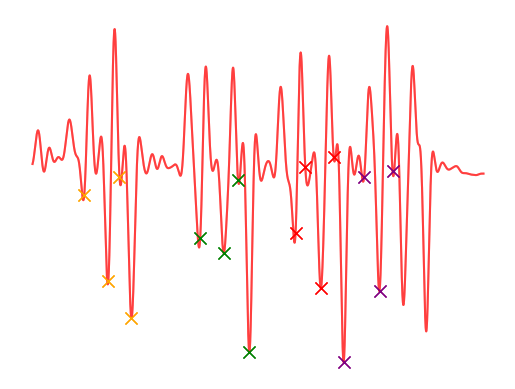

In [94]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Turn off axis scale demarcations
plt.axis('off')

# Plot filtered data for data1
plt.plot(filtered_data1, 'r', alpha=0.5)

# Plot peaks for data1
plt.plot(left_peaks1, filtered_data1[left_peaks1], 'x', color='orange', markersize=8)
plt.plot(right_peaks1, filtered_data1[right_peaks1], 'gx', markersize=8)
plt.plot(up_peaks1, filtered_data1[up_peaks1], 'rx', markersize=8)
plt.plot(down_peaks1, filtered_data1[down_peaks1], 'x', color='purple', markersize=8)

# Set x-axis ticks and labels
plt.xticks(range(0, len(filtered_data1), 100))

# Save the figure
plt.savefig('filtered_data1_peaks.png', dpi=300, bbox_inches='tight', pad_inches=0)

# Set axis line color
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Turn off axis scale demarcations
ax.tick_params(axis='both', which='both', length=0)

# Plot filtered data for data1
plt.plot(filtered_data1, 'r', alpha=0.5)

# Plot peaks for data1
plt.plot(left_peaks1, filtered_data1[left_peaks1], 'x', color='orange', markersize=8)
plt.plot(right_peaks1, filtered_data1[right_peaks1], 'gx', markersize=8)
plt.plot(up_peaks1, filtered_data1[up_peaks1], 'rx', markersize=8)
plt.plot(down_peaks1, filtered_data1[down_peaks1], 'x', color='purple', markersize=8)

# Set background color to transparent
fig = plt.gcf()
fig.patch.set_alpha(0)

# Save the figure
plt.savefig('filtered_data1_peaks.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)


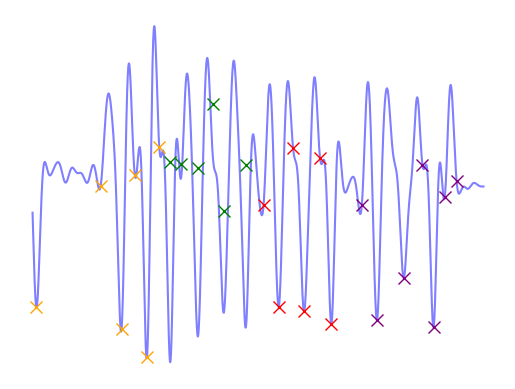

In [47]:
# Filter signal, take second derivative, and detect peaks for data2
filtered_data2 = butter_filter(data2['Current'], cutoff_freq, fs, order=4)
second_derivative2 = np.gradient(np.gradient(filtered_data2))
best_window2 = None
best_threshold2 = None
best_peaks2 = None
best_score2 = 0
for window in window_sizes:
     for threshold in threshold_levels:
        min_dist = int(window * fs)
        peaks, properties = find_peaks(second_derivative2, height=threshold * baseline, distance=min_dist)
        score = len(peaks)
        if score > best_score2:
            best_window2 = window
            best_threshold2 = threshold
            best_peaks2 = peaks
            best_score2 = score

num_peaks_per_movement2 = len(best_peaks2) // 4
left_peaks2 = best_peaks2[:num_peaks_per_movement2]
right_peaks2 = best_peaks2[num_peaks_per_movement2:num_peaks_per_movement2*2]
up_peaks2 = best_peaks2[num_peaks_per_movement2*2:num_peaks_per_movement2*3]
down_peaks2 = best_peaks2[num_peaks_per_movement2*3:]

# Turn off axis scale demarcations
plt.axis('off')

# Set axis line color
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Turn off axis scale demarcations
ax.tick_params(axis='both', which='both', length=0)


# Plot filtered data for data1
plt.plot(filtered_data2, 'b', alpha=0.5)

# Plot peaks for data1
plt.plot(left_peaks2, filtered_data2[left_peaks2], 'x', color='orange', markersize=8)
plt.plot(right_peaks2, filtered_data1[right_peaks2], 'gx', markersize=8)
plt.plot(up_peaks2, filtered_data2[up_peaks2], 'rx', markersize=8)
plt.plot(down_peaks2, filtered_data2[down_peaks2], 'x', color='purple', markersize=8)

# Set background color to transparent
fig = plt.gcf()
fig.patch.set_alpha(0)

# Save the figure
plt.savefig('filtered_data1_peaks.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)


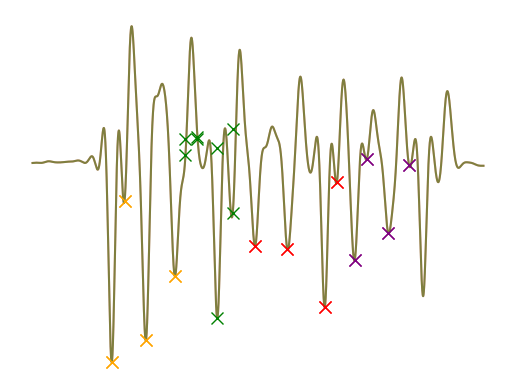

In [48]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Turn off axis scale demarcations
plt.axis('off')

# Plot filtered data for data1
plt.plot(filtered_data3, 'r', alpha=0.5)

# Plot peaks for data1
plt.plot(left_peaks3, filtered_data3[left_peaks3], 'x', color='orange', markersize=8)
plt.plot(right_peaks3, filtered_data1[right_peaks3], 'gx', markersize=8)
plt.plot(up_peaks3, filtered_data3[up_peaks3], 'rx', markersize=8)
plt.plot(down_peaks3, filtered_data3[down_peaks3], 'x', color='purple', markersize=8)

# Set x-axis ticks and labels
plt.xticks(range(0, len(filtered_data3), 100))

# Save the figure
plt.savefig('filtered_data1_peaks.png', dpi=300, bbox_inches='tight', pad_inches=0)

# Set axis line color
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Turn off axis scale demarcations
ax.tick_params(axis='both', which='both', length=0)

# Plot filtered data for data1
plt.plot(filtered_data3, 'g', alpha=0.5)

# Plot peaks for data1
plt.plot(left_peaks3, filtered_data3[left_peaks3], 'x', color='orange', markersize=8)
plt.plot(right_peaks3, filtered_data3[right_peaks3], 'gx', markersize=8)
plt.plot(up_peaks3, filtered_data3[up_peaks3], 'rx', markersize=8)
plt.plot(down_peaks3, filtered_data3[down_peaks3], 'x', color='purple', markersize=8)

# Set background color to transparent
fig = plt.gcf()
fig.patch.set_alpha(0)

# Save the figure
plt.savefig('filtered_data1_peaks.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)


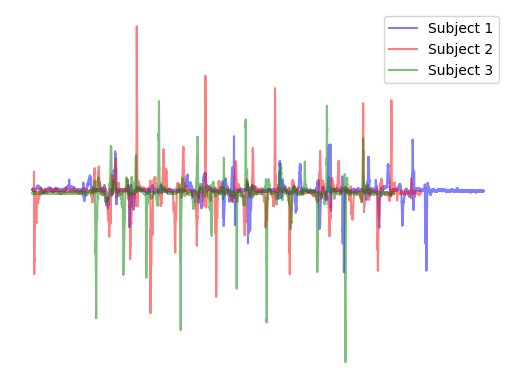

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error, mean_squared_error

# Define butter_filter function
def butter_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Load CSV files into DataFrames
data1 = pd.read_csv('Subject 1 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data2 = pd.read_csv('Subject 2 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])
data3 = pd.read_csv('Subject 3 (Left right up down).csv', header=0, names=['Time', 'Current'], na_values=[])

# Turn off axis scale demarcations and labels
plt.axis('off')

# Set axis line color
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Turn off axis scale demarcations and labels
ax.tick_params(axis='both', which='both', length=0, labelcolor='none')

# Plot unfiltered data for data1 with dark blue color and transparency
plt.plot(data1['Current'], color='b', alpha=0.5)

# Set background color to transparent
fig = plt.gcf()
fig.patch.set_alpha(0)

# Save the figure for data1
plt.savefig('unfiltered_data1.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)

# Plot unfiltered data for data2 with dark blue color and transparency
plt.plot(data2['Current'], color='r', alpha=0.5)

# Save the figure for data2
plt.savefig('unfiltered_data2.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)

# Plot unfiltered data for data3 with dark blue color and transparency
plt.plot(data3['Current'], color='g', alpha=0.5)

# Save the figure for data3
plt.savefig('unfiltered_data3.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
# Add legend
plt.legend(['Subject 1', 'Subject 2', 'Subject 3'], loc='upper right')
# Show the plots
plt.show()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

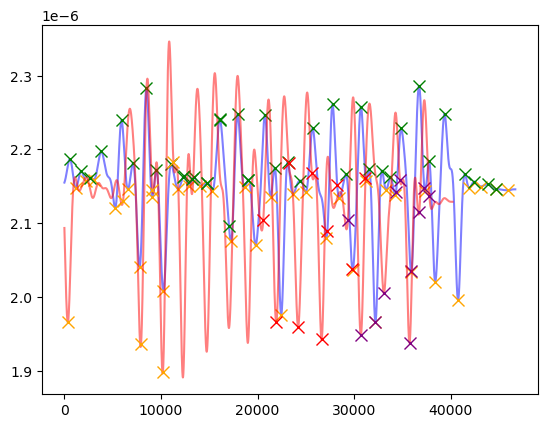

In [113]:
# Plot unfiltered data for data1 with dark blue color and no transparency
plt.plot(filtered_data1, color='b', alpha=0.5, label='Subject 1', linestyle='-')
plt.plot(left_peaks1, filtered_data1[left_peaks1], 'x', color='orange', markersize=8, linestyle='none', label='Left Peaks')
plt.plot(right_peaks1, filtered_data1[right_peaks1], 'x', color='green', markersize=8, linestyle='none', label='Right Peaks')
plt.plot(up_peaks1, filtered_data1[up_peaks1], 'x', color='red', markersize=8, linestyle='none', label='Up Peaks')
plt.plot(down_peaks1, filtered_data1[down_peaks1], 'x', color='purple', markersize=8, linestyle='none', label='Down Peaks')

# Plot unfiltered data for data2 with dark red color and no transparency
plt.plot(filtered_data2, color='r', alpha=0.5, label='Subject 2',  linestyle='-')
plt.plot(left_peaks2, filtered_data2[left_peaks2], 'x', color='orange', markersize=8, linestyle='none')
plt.plot(right_peaks2, filtered_data1[right_peaks2], 'x', color='green', markersize=8, linestyle='none')
plt.plot(up_peaks2, filtered_data2[up_peaks2], 'x', color='red', markersize=8, linestyle='none')
plt.plot(down_peaks2, filtered_data2[down_peaks2], 'x', color='purple', markersize=8, linestyle='none')

# Plot unfiltered data for data3 with dark green color and no transparency
plt.plot(filtered_data3, color='g', alpha=0.5, label='Subject 3,  linestyle='-'')
plt.plot(left_peaks3, filtered_data3[left_peaks3], 'x', color='orange', markersize=8, linestyle='none')
plt.plot(right_peaks3, filtered_data3[right_peaks3], 'x', color='green', markersize=8, linestyle='none')
plt.plot(up_peaks3, filtered_data3[up_peaks3], 'x', color='red', markersize=8, linestyle='none')
plt.plot(down_peaks3, filtered_data3[down_peaks3], 'x', color='purple', markersize=8, linestyle='none')

# Set axis line color and turn off axis scale demarcations and labels
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='both', which='both', length=0, labelcolor='none')
ax.xaxis.set_tick_params(width=2, length=10, direction='out')
ax.yaxis.set_tick_params(width=2, length=10, direction='out')

# Set the alpha value of the figure patch to 0
fig = plt.gcf()
fig.patch.set_alpha(0)

# Set y-axis label format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1f}'.format(x * (1+10**6))))

# Add legend
legend_labels = ['Left Peaks', 'Right Peaks', 'Up Peaks', 'Down Peaks', 'Subject 1', 'Subject 2', 'Subject 3']
plt.legend(legend_labels, loc='upper right')




# Show the plots
plt.show()


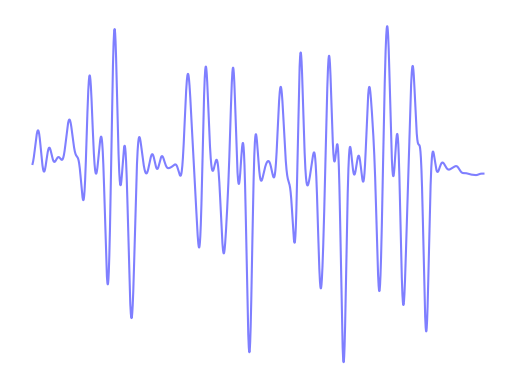

In [102]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Turn off axis scale demarcations
plt.axis('off')

# Plot filtered data for data1
# plt.plot(filtered_data1, 'b', alpha=0.5)

# Plot peaks for data1


# Set x-axis ticks and labels
# plt.xticks(range(0, len(filtered_data1), 100))

# Save the figure
plt.savefig('filtered_data1_peaks.png', dpi=300, bbox_inches='tight', pad_inches=0)

# Set axis line color
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Turn off axis scale demarcations
ax.tick_params(axis='both', which='both', length=0)

# Plot filtered data for data1
plt.plot(filtered_data1, 'b', alpha=0.5)

# Plot peaks for data1


# Set background color to transparent
fig = plt.gcf()
fig.patch.set_alpha(0)

# Save the figure
plt.savefig('filtered_data1_peaks.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)


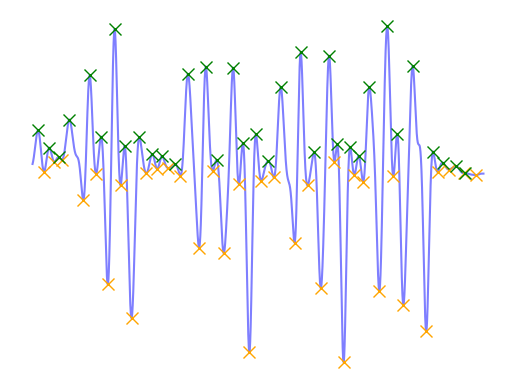

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Find peaks using numpy's peak finding function
left_peaks1, _ = find_peaks(-filtered_data1)  # minima peaks
right_peaks1, _ = find_peaks(filtered_data1)  # maxima peaks


# Compute second derivative to detect inflection points
deriv2 = np.gradient(np.gradient(filtered_data1))

# Find up and down inflection points
up_inflections1, _ = find_peaks(deriv2, prominence=0.5)  # up inflections
down_inflections1, _ = find_peaks(-deriv2, prominence=0.5)  # down inflections

# Turn off axis scale demarcations
plt.axis('off')

# Set x-axis ticks and labels
plt.xticks(range(0, len(filtered_data1), 100))

# Set axis line color
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Turn off axis scale demarcations
ax.tick_params(axis='both', which='both', length=0)

# Plot filtered data for data1
plt.plot(filtered_data1, 'b', alpha=0.5)

# Plot peaks and inflection points for data1
plt.plot(left_peaks1, filtered_data1[left_peaks1], 'x', color='orange', markersize=8)
plt.plot(right_peaks1, filtered_data1[right_peaks1], 'gx', markersize=8)
plt.plot(up_inflections1, filtered_data1[up_inflections1], 'rx', markersize=8)
plt.plot(down_inflections1, filtered_data1[down_inflections1], 'x', color='purple', markersize=8)

# Set background color to transparent
fig = plt.gcf()
fig.patch.set_alpha(0)

# Save the figure
plt.savefig('filtered_data1_peaks.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)


NameError: name 'second_derivative' is not defined

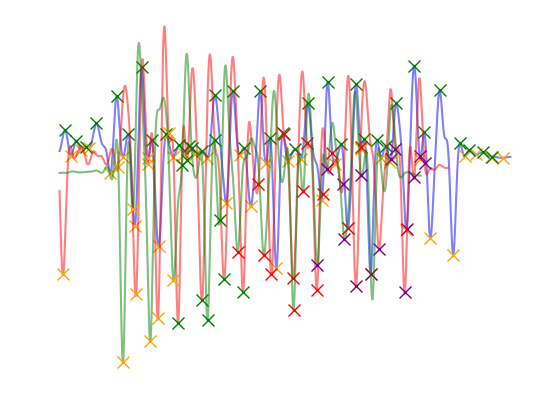

In [124]:
# Plot unfiltered data for data1 with dark blue color and no transparency
plt.plot(filtered_data1, color='b', alpha=0.5, label='Subject 1', linestyle='-')
plt.plot(left_peaks1, filtered_data1[left_peaks1], 'x', color='orange', markersize=8, linestyle='none')
plt.plot(right_peaks1, filtered_data1[right_peaks1], 'x', color='green', markersize=8, linestyle='none')
plt.plot(up_peaks1, filtered_data1[up_peaks1], 'x', color='red', markersize=8, linestyle='none')
plt.plot(down_peaks1, filtered_data1[down_peaks1], 'x', color='purple', markersize=8, linestyle='none')

# Plot unfiltered data for data2 with dark red color and no transparency
plt.plot(filtered_data2, color='r', alpha=0.5, label='Subject 2', linestyle='-')
plt.plot(left_peaks2, filtered_data2[left_peaks2], 'x', color='orange', markersize=8, linestyle='none')
plt.plot(right_peaks2, filtered_data2[right_peaks2], 'x', color='green', markersize=8, linestyle='none')
plt.plot(up_peaks2, filtered_data2[up_peaks2], 'x', color='red', markersize=8, linestyle='none')
plt.plot(down_peaks2, filtered_data2[down_peaks2], 'x', color='purple', markersize=8, linestyle='none')

# Plot unfiltered data for data3 with dark green color and no transparency
plt.plot(filtered_data3, color='g', alpha=0.5, label='Subject 3', linestyle='-')
plt.plot(left_peaks3, filtered_data3[left_peaks3], 'x', color='orange', markersize=8, linestyle='none')
plt.plot(right_peaks3, filtered_data3[right_peaks3], 'x', color='green', markersize=8, linestyle='none')
plt.plot(up_peaks3, filtered_data3[up_peaks3], 'x', color='red', markersize=8, linestyle='none')
plt.plot(down_peaks3, filtered_data3[down_peaks3], 'x', color='purple', markersize=8, linestyle='none')

# Set axis line color and turn off axis scale demarcations and labels
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='both', which='both', length=0, labelcolor='none')
# ax.xaxis.set_tick_params(width=2, length=10, direction='out')
# ax.yaxis.set_tick_params(width=2, length=10, direction='out' 

# Set background color to transparent
fig = plt.gcf()
fig.patch.set_facecolor('None')

# Set y-axis label format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1f}'.format(x * (1+10**6))))

# # Add legend
# legend_labels = [ 'Subject 1', 'Subject 2', 'Subject 3', 'Left Peaks', 'Right Peaks', 'Up Peaks', 'Down Peaks',]
# plt.legend(legend_labels, loc='lower right')

# Show the plots
plt.show()


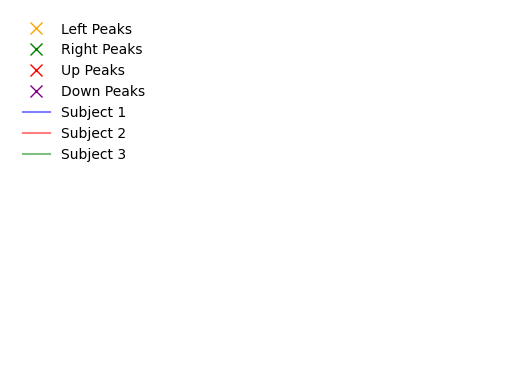

In [127]:
import matplotlib.pyplot as plt

# Create empty plot for legend
fig, ax = plt.subplots()

# Add legend entries
ax.plot([], [], 'x', color='orange', markersize=8, label='Left Peaks')
ax.plot([], [], 'x', color='green', markersize=8, label='Right Peaks')
ax.plot([], [], 'x', color='red', markersize=8, label='Up Peaks')
ax.plot([], [], 'x', color='purple', markersize=8, label='Down Peaks')
ax.plot([], [], '-', color='b', alpha=0.5, label='Subject 1')
ax.plot([], [], '-', color='r', alpha=0.5 ,  label='Subject 2')
ax.plot([], [], '-', color='g', alpha=0.5, label='Subject 3')

# Set legend location and remove frame
ax.legend(loc='upper left', frameon=False)
# fig = plt.gcf()
# fig.patch.set_alpha(0)
# Hide plot
ax.axis('off')

# Show the legend
plt.show()

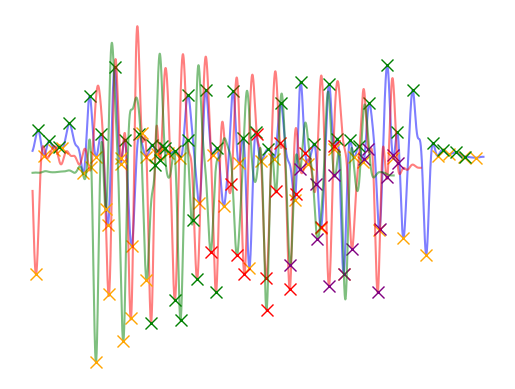

In [126]:
# Plot unfiltered data for data1 with dark blue color and no transparency
plt.plot(filtered_data1, color='b', alpha=0.5, label='Subject 1', linestyle='-')
plt.plot(left_peaks1, filtered_data1[left_peaks1], 'x', color='orange', markersize=8, linestyle='none')
plt.plot(right_peaks1, filtered_data1[right_peaks1], 'x', color='green', markersize=8, linestyle='none')
plt.plot(up_peaks1, filtered_data1[up_peaks1], 'x', color='red', markersize=8, linestyle='none')
plt.plot(down_peaks1, filtered_data1[down_peaks1], 'x', color='purple', markersize=8, linestyle='none')

# Plot unfiltered data for data2 with dark red color and no transparency
plt.plot(filtered_data2, color='r', alpha=0.5, label='Subject 2', linestyle='-')
plt.plot(left_peaks2, filtered_data2[left_peaks2], 'x', color='orange', markersize=8, linestyle='none')
plt.plot(right_peaks2, filtered_data2[right_peaks2], 'x', color='green', markersize=8, linestyle='none')
plt.plot(up_peaks2, filtered_data2[up_peaks2], 'x', color='red', markersize=8, linestyle='none')
plt.plot(down_peaks2, filtered_data2[down_peaks2], 'x', color='purple', markersize=8, linestyle='none')

# Plot unfiltered data for data3 with dark green color and no transparency
plt.plot(filtered_data3, color='g', alpha=0.5, label='Subject 3', linestyle='-')
plt.plot(left_peaks3, filtered_data3[left_peaks3], 'x', color='orange', markersize=8, linestyle='none')
plt.plot(right_peaks3, filtered_data3[right_peaks3], 'x', color='green', markersize=8, linestyle='none')
plt.plot(up_peaks3, filtered_data3[up_peaks3], 'x', color='red', markersize=8, linestyle='none')
plt.plot(down_peaks3, filtered_data3[down_peaks3], 'x', color='purple', markersize=8, linestyle='none')

# Turn off axis scale demarcations and labels
plt.axis('off')

# Set axis line color
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Turn off axis scale demarcations and labels
ax.tick_params(axis='both', which='both', length=0, labelcolor='none')



# Set background color to transparent
fig = plt.gcf()
fig.patch.set_alpha(0)


# # Add legend
# plt.legend(['Subject 1', 'Subject 2', 'Subject 3'], loc='upper right')
# Show the plots
plt.show()
